In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

date of satellite pics --> filter data --> get pics from satellite --> run study

In [16]:
#%%time
#data = pd.read_csv('ca_daily_fire_2000_2021.csv')
#data.head()

In [19]:
%%time
data_v2 = pd.read_csv('ca_daily_fire_2000_2021-v2.csv')

CPU times: user 160 ms, sys: 40.7 ms, total: 201 ms
Wall time: 201 ms


In [18]:
data_v2['acq_date'] = pd.to_datetime(data_v2['acq_date'])
data_v2.head()

,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence,year,month
0,32.4646,-114.6906,2011-06-29,Terra,MODIS,91.1,0,315.7,84,2011,6
1,32.4768,-114.6785,2011-10-11,Terra,MODIS,96.2,0,313.7,100,2011,10
2,32.4937,-114.7856,2013-02-06,Terra,MODIS,26.9,0,296.1,65,2013,2
3,32.4987,-114.7985,2010-02-04,Terra,MODIS,22.2,0,282.9,62,2010,2
4,32.5006,-114.7929,2009-07-08,Aqua,MODIS,172.0,0,316.4,78,2009,7


In [24]:
data_v2.groupby(['latitude','longitude']).size().reset_index().rename(columns={0:'count'})

,latitude,longitude,count
0,32.4646,-114.6906,1
1,32.4768,-114.6785,1
2,32.4937,-114.7856,1
3,32.4987,-114.7985,1
4,32.5006,-114.7929,1
...,...,...,...
221134,41.9998,-121.0237,1
221135,41.9998,-120.7090,1
221136,41.9998,-114.9167,1
221137,41.9999,-123.5675,1


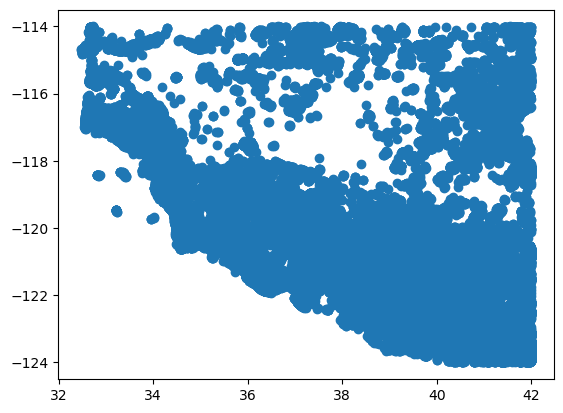

In [26]:
plt.scatter(data_v2['latitude'], data_v2['longitude'])

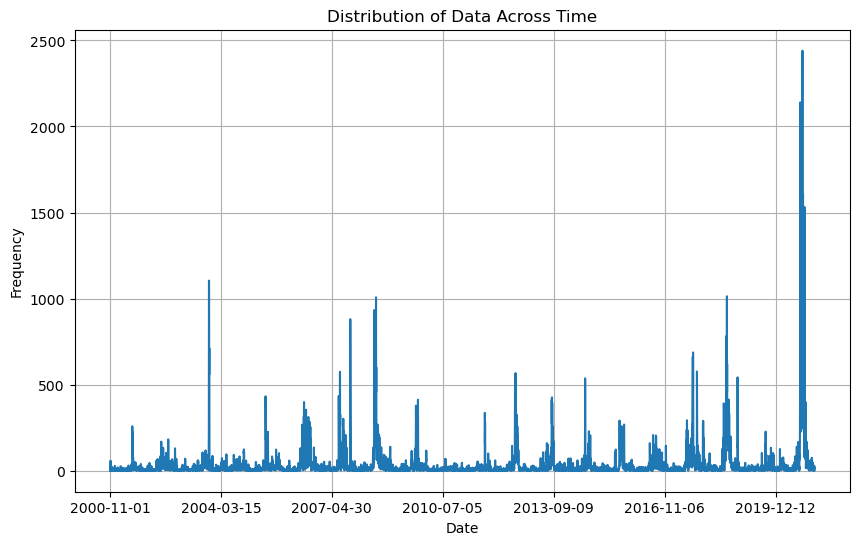

In [21]:
date_counts = data_v2['acq_date'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 6))
date_counts.plot(kind='line')  # You can choose other plot types like 'bar', 'hist', etc.
plt.title('Distribution of Data Across Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [32]:
cal_data = pd.read_csv('California_Fire_Perimeters_(all).csv')
#cal_data['ALARM_DATE'] = pd.to_datetime(cal_data['ALARM_DATE'])
#cal_data['CONT_DATE'] = pd.to_datetime(cal_data['CONT_DATE'])
#cal_data.shape
cal_data.head()

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NAME,COMPLEX_INCNUM,IRWINID,FIRE_NUM,DECADES,SHAPE_Length,SHAPE_Area
0,21440,2020,CA,CDF,NEU,NELSON,00013212,2020/06/18 00:00:00+00,2020/06/23 00:00:00+00,11.0,...,1.0,109.602280,NaN,NaN,NaN,NaN,NaN,2020,4179.743142,7.331347e+05
1,21441,2020,CA,CDF,NEU,AMORUSO,00011799,2020/06/01 00:00:00+00,2020/06/04 00:00:00+00,2.0,...,1.0,685.585020,NaN,NaN,NaN,NaN,NaN,2020,12399.375391,4.578172e+06
2,21442,2020,CA,CDF,NEU,ATHENS,00018493,2020/08/10 00:00:00+00,2020/08/11 00:00:00+00,14.0,...,1.0,27.300480,NaN,NaN,NaN,NaN,NaN,2020,2119.194120,1.823876e+05
3,21443,2020,CA,CDF,NEU,FLEMING,00007619,2020/03/31 00:00:00+00,2020/04/01 00:00:00+00,9.0,...,1.0,12.931545,NaN,NaN,NaN,NaN,NaN,2020,2029.524881,8.667942e+04
4,21444,2020,CA,CDF,NEU,MELANESE,00008471,2020/04/14 00:00:00+00,2020/04/19 00:00:00+00,18.0,...,1.0,10.315964,NaN,NaN,NaN,NaN,NaN,2020,1342.742903,7.017912e+04


In [30]:
cal_data['ALARM_DATE'][0]

str